<a href="https://colab.research.google.com/github/mankow58047/JavaLottery/blob/main/Assignment3_manikowski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install packages and import libraries

In [1]:
!pip install -q seaborn


In [96]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense

from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import io

## Load data set

In [97]:
url = 'http://www.cs.ndsu.nodak.edu/~siludwig/regressiondataset.csv'
raw_dataset = pd.read_csv(url,
 na_values='?', comment='\t',
 sep=',', skipinitialspace=True)

In [98]:
dataset = raw_dataset.copy()
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.85, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_data = train_dataset.copy()
test_data = test_dataset.copy()
train_X = train_data.iloc[:,:-1]
test_X = test_data.iloc[:,:-1]
train_Y = train_data.iloc[:,-1:]
test_Y = test_data.iloc[:,-1:]


#Normalize data

In [99]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [100]:
normalizer.adapt(np.array(train_X))
print(normalizer.mean.numpy())

[[8.54791565e+01 6.11369400e+01 6.46662979e+01 4.18292427e+01
  1.39784408e+00 1.33534825e+00 1.46700104e+02 2.41042900e+01
  5.31001778e+01 5.16953239e+01 7.75787720e+02 9.58372681e+02
  7.29436035e+02 8.97891541e+02 1.54501724e+00 1.03010702e+00
  8.00688538e+02 6.04611084e+02 2.92081299e+02 3.25399384e+02
  1.61308990e+02 1.20666466e+02 1.41022690e+02 9.91362000e+01
  1.50645173e+00 1.41052365e+00 3.68324699e+01 6.73249130e+01
  7.15343475e+01 4.94707129e+03 3.49174390e+03 1.03686523e+03
  3.98796509e+02 1.24841416e+00 9.84236121e-01 9.92039160e+03
  2.03500867e+03 3.63913477e+03 3.79857935e+03 7.26312485e+01
  1.02154869e+02 4.45753593e+01 7.56496735e+01 1.27002323e+00
  8.45462203e-01 1.36980743e+02 6.99079666e+01 5.41810570e+01
  5.07435265e+01 8.39590549e+00 5.94213676e+00 4.44853592e+00
  2.38056159e+00 1.33180368e+00 1.15525639e+00 3.11193371e+00
  5.66478062e+00 5.56502724e+00 1.05928734e+02 9.50569916e+01
  1.20034790e+01 6.44965839e+00 7.06719697e-01 4.41082716e-01
  3.8956

In [101]:
first = np.array(train_X[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  76.52   57.09   59.31   35.87    1.2     0.95  122.91   36.1    44.29
    52.84  787.05 1011.5   734.22  940.22    1.31    0.78  772.    741.64
   314.51  353.88  151.75  104.24  131.3    84.06    1.28    1.13   49.15
    65.58   66.91 4434.36 2981.06  674.48   53.68    1.      0.75 8958.57
  1657.73 3402.86 3589.59   79.61  112.02   48.48   99.53    1.1     0.78
   135.97   81.33   54.37   42.08    6.91    3.83    3.48    1.04    1.09
     0.94    1.74    4.6     4.65  112.01   61.22    8.34    0.63    0.4
     0.27  399.97   57.13  166.74  138.47    2.27    2.21    2.23    1.37
     1.03    1.11    0.43    0.44]]

Normalized: [[-0.6  -0.26 -0.49 -0.41 -1.04 -1.82 -0.7   1.04 -0.71  0.1   0.23  0.5
   0.11  0.46 -1.21 -0.97 -0.56  0.73  0.78  0.66 -0.78 -0.76 -0.87 -0.63
  -1.15 -1.56  0.82 -0.21 -0.49 -0.55 -0.48 -0.92 -0.46 -1.1  -1.04 -0.48
  -0.57 -0.31 -0.46  0.55  0.66  0.24  1.14 -1.02 -0.39 -0.03  0.71  0.02
  -1.01 -0.43 -0.38 -0.79 -0.27 -1.   -1.05 -0.25 

In [103]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 76)               153       
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 1)                 77        
                                                                 
Total params: 230
Trainable params: 77
Non-trainable params: 153
_________________________________________________________________


In [104]:
linear_model.predict(train_X[:10])

1/1 [==============================] - 0s 61ms/step


array([[ 0.11557   ],
       [-0.7833826 ],
       [-0.86925894],
       [ 0.5705761 ],
       [-1.0911028 ],
       [ 0.08117306],
       [-0.32699102],
       [-1.4276375 ],
       [ 3.0623472 ],
       [-0.00372398]], dtype=float32)

#TO DO: Fit, Evaluate, Predict, Plot

##Plots, etc.

In [ ]:
def plot_loss(history):
  pyplot.plot(history.history['loss'], label='loss')
  pyplot.plot(history.history['val_loss'], label='val_loss')
  pyplot.ylim([0, 40])
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Error')
  pyplot.legend()
  pyplot.grid(True)

##maybe not

In [72]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    loss='mean_absolute_error'
)

In [73]:
history = linear_model.fit(
    train_X,
    train_Y, 
    epochs=100,
    verbose=0,
    validation_split=.02
)

In [74]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,15.351204,14.703602,95
96,15.350262,14.619049,96
97,15.364980,14.652716,97
98,15.356421,14.640827,98
99,15.349932,14.719771,99


In [150]:
def plot_loss(history):
  pyplot.plot(history.history['loss'], label='loss')
  pyplot.plot(history.history['val_loss'], label='val_loss')
  pyplot.ylim([0, 40])
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Error')
  pyplot.legend()
  pyplot.grid(True)

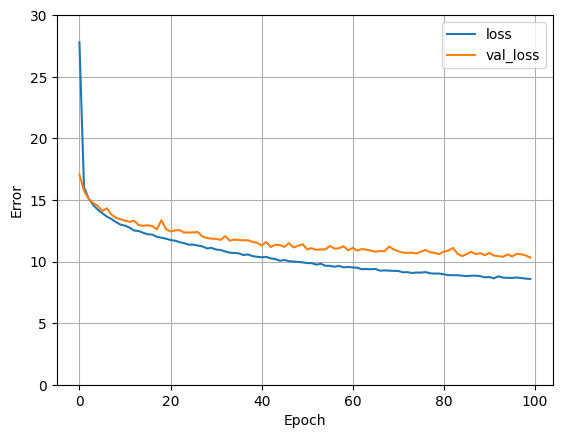

In [131]:
plot_loss(history)

##Experiment 1
- Sequential 
- adam
- relu

In [159]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(76, activation='relu'),
      layers.Dense(76, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [160]:
dnn_model = build_and_compile_model(normalizer)

In [161]:
dnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 76)               153       
 ion)                                                            
                                                                 
 dense_37 (Dense)            (None, 76)                5852      
                                                                 
 dense_38 (Dense)            (None, 76)                5852      
                                                                 
 dense_39 (Dense)            (None, 1)                 77        
                                                                 
Total params: 11,934
Trainable params: 11,781
Non-trainable params: 153
_________________________________________________________________


In [162]:
%%time
history = dnn_model.fit(
    train_X,
    train_Y,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 48.6 s, sys: 2.49 s, total: 51.1 s
Wall time: 43.6 s


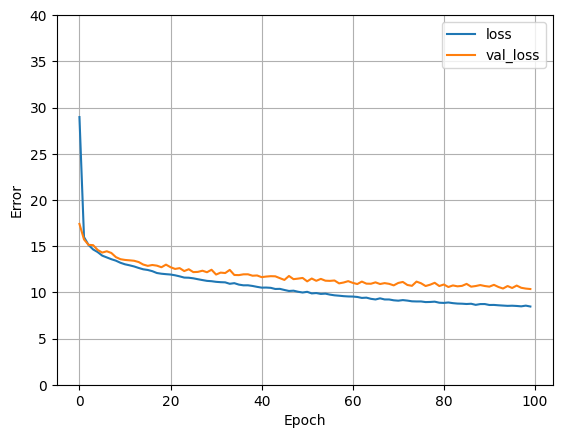

In [163]:
plot_loss(history)

##Experiment 2
- Sequential 
- adafactor
- relu

In [167]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(76, activation='relu'),
      layers.Dense(76, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adafactor(0.001))
  return model

In [168]:
dnn_model = build_and_compile_model(normalizer)

In [169]:
dnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 76)               153       
 ion)                                                            
                                                                 
 dense_43 (Dense)            (None, 76)                5852      
                                                                 
 dense_44 (Dense)            (None, 76)                5852      
                                                                 
 dense_45 (Dense)            (None, 1)                 77        
                                                                 
Total params: 11,934
Trainable params: 11,781
Non-trainable params: 153
_________________________________________________________________


In [170]:
%%time
history = dnn_model.fit(
    train_X,
    train_Y,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 53.6 s, sys: 2.68 s, total: 56.3 s
Wall time: 45.6 s


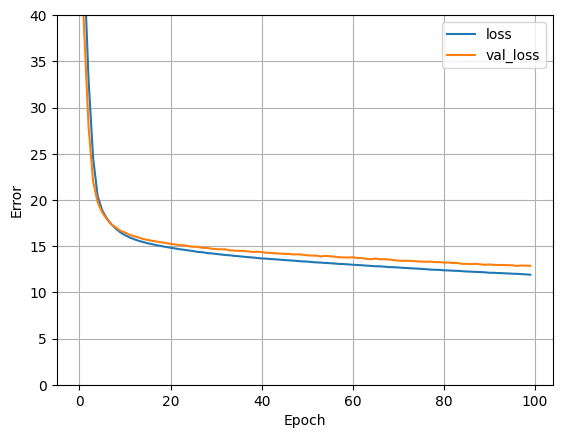

In [171]:
plot_loss(history)

##Experiment 3
- Sequential 
- adamW
- relu